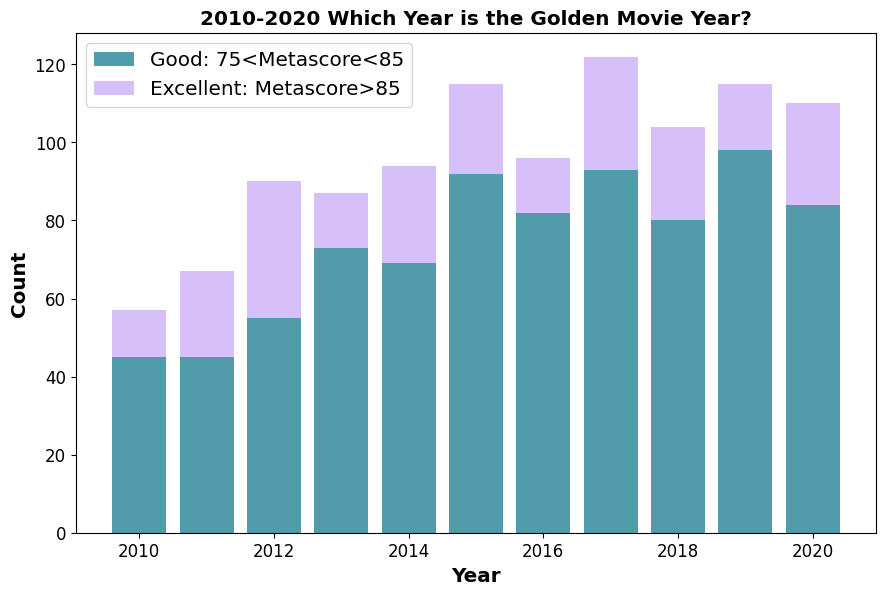

In [97]:
import json
# open username and password from another file.
with open('C:\\Users\\xianx\\Documents\\xianw_secret.json') as f:
      data = json.load(f)
      username = data['username']
      password = data['password']
#print (username+" :" +password)

# import pyodbc
import pyodbc

# setup connection to SQLserver, with specific credentials
connection=pyodbc.connect("DRIVER={SQL Server};"
                          "SERVER=LAPTOP-8VUQJOSL;"
                          "DATABASE=python_movies;"
                          "Trusted_Connection=Yes;"
                          "UID="+username+";"
                          "PWD="+password)
cursor=connection.cursor()
 # import metaplotlid 
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy as np

# update the figure setting
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
# create sql query
sql1='select count(MovieID), year(ReleaseDate) from [dbo].[MetacriticMovies] where score<85 and score>75 group by year(ReleaseDate)'
sql2='select count(MovieID),year(ReleaseDate) from [dbo].[MetacriticMovies] where score>85  group by year(ReleaseDate)'

# fetch all the count and year data
GoodMovies=cursor.execute(sql1).fetchall()
ExcellentMovies=cursor.execute(sql2).fetchall()

# create 3 arrays for each data group
count1=[]
years=[]
count2=[]

# loop to collect data for each group
for rows in GoodMovies:
     count1.append(rows[0])
     years.append(rows[1])
# not collect year data since the second bar build on top of first bar
for rows in ExcellentMovies: 
    count2.append(rows[0])

# generate bar for the data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,count1,color = '#529bab')
ax.bar(years,count2,bottom=count1,color ='#d7c0fa')
# update the figure, chart, label setting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (17, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
plt.title('2010-2020 Which Year is the Golden Movie Year?',fontweight="bold")
plt.xlabel('Year',fontweight="bold")
plt.ylabel('Count',fontweight="bold")
plt.legend(["Good: 75<Metascore<85","Excellent: Metascore>85"],loc="upper left")
plt.show()